In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
file_path = "shopping_trends_updated.csv"
df = pd.read_csv(file_path)

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
df.dtypes


Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [11]:
df.shape

(3900, 18)

In [13]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [15]:
print("Dataset Information:")
df.info()
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used    

# Data Preprocessing
Convert categorical columns with 'Yes'/'No' values to boolean

In [18]:
boolean_columns = ['Discount Applied', 'Promo Code Used', 'Subscription Status']
for col in boolean_columns:
    df[col] = df[col].map({'Yes': True, 'No': False})

In [22]:
# Convert 'Review Rating' to categorical bins
rating_bins = [0, 2, 3, 4, 5]
rating_labels = ['Poor', 'Average', 'Good', 'Excellent']
df['Review Rating Category'] = pd.cut(df['Review Rating'], bins=rating_bins, labels=rating_labels)


# Exploratory Data Analysis (EDA)

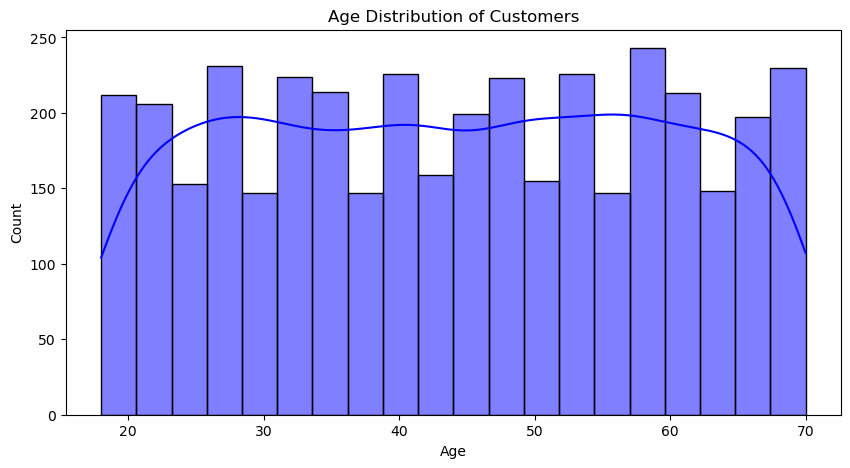

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\2907820617.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




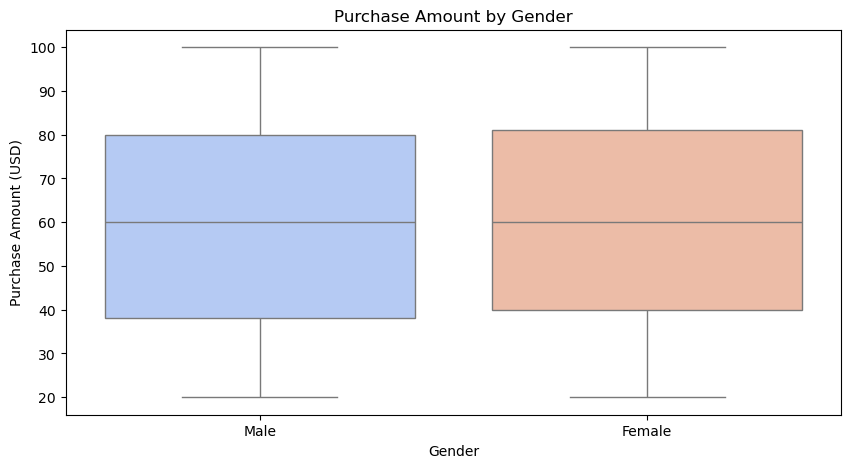

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\3768623621.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




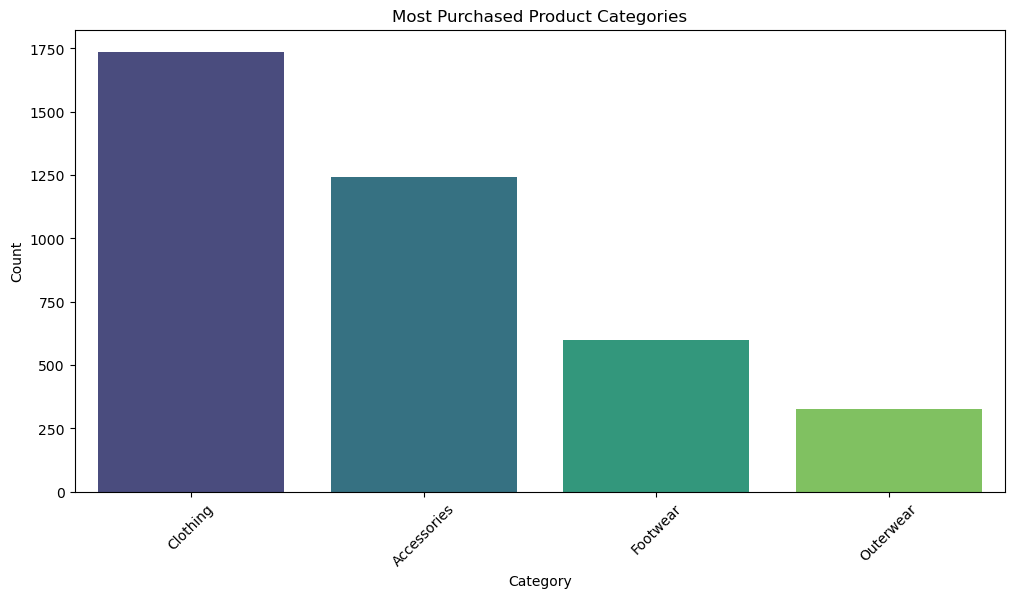

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Purchased Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [33]:
# Seasonal Purchase Trends

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\3587258116.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




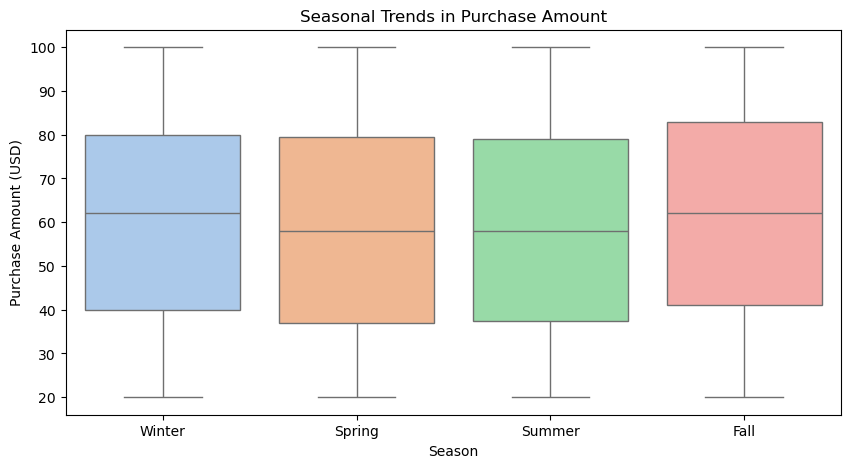

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette='pastel')
plt.title('Seasonal Trends in Purchase Amount')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [37]:
# Payment Method Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\2184223636.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




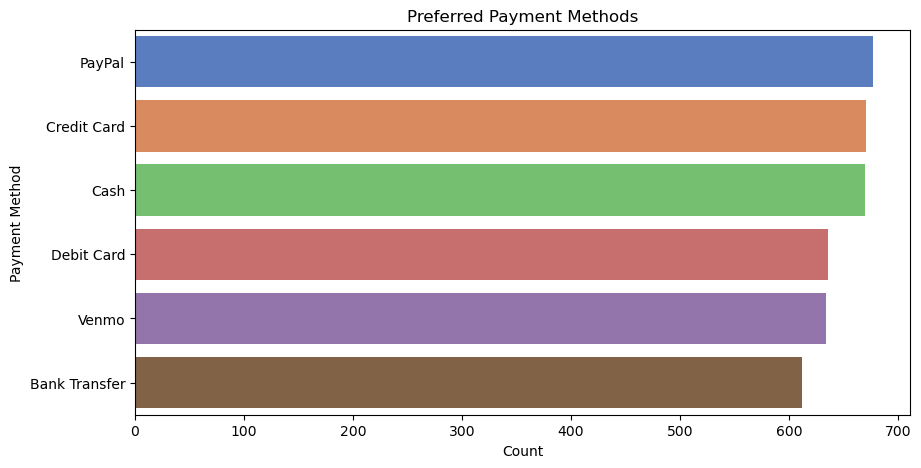

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Payment Method', data=df, order=df['Payment Method'].value_counts().index, palette='muted')
plt.title('Preferred Payment Methods')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

In [41]:
# Relationship Between Discounts and Purchase Amount

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\2566773031.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




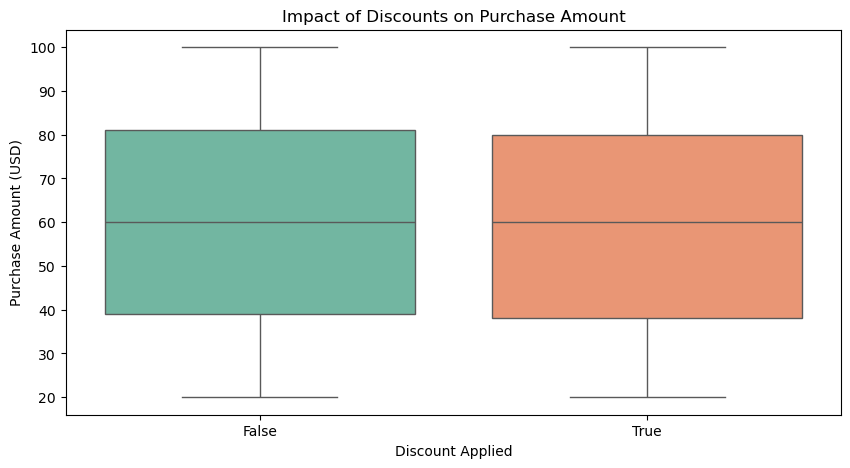

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Impact of Discounts on Purchase Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()


# 1 What is the overall distribution of customer ages in the dataset?

In [46]:
df['Age'].value_counts() #name of datframe[column].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [48]:
df['Age'].mean()

44.06846153846154

In [50]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

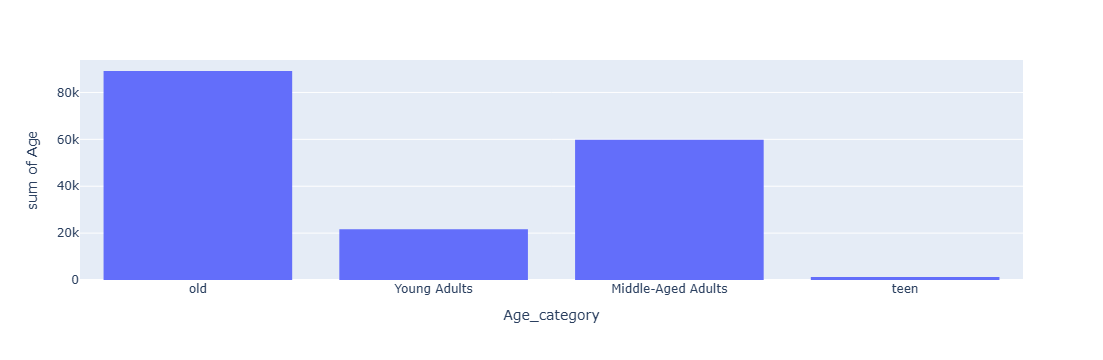

In [52]:
df['Age_category'] = pd.cut(df['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )
fig = px.histogram(df , y = 'Age' , x = 'Age_category')
fig.show()

# 2. Average purchase amount per category

In [55]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Review Rating Category',
       'Age_category'],
      dtype='object')

In [57]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [59]:
df[['Category','Purchase Amount (USD)']]

,Category,Purchase Amount (USD)
0,Clothing,53
1,Clothing,64
2,Clothing,73
3,Footwear,90
4,Clothing,49
...,...,...
3895,Clothing,28
3896,Accessories,49
3897,Accessories,33
3898,Footwear,77


In [61]:
df.groupby('Category')['Purchase Amount (USD)'].sum()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

In [63]:
df.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\1640623733.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




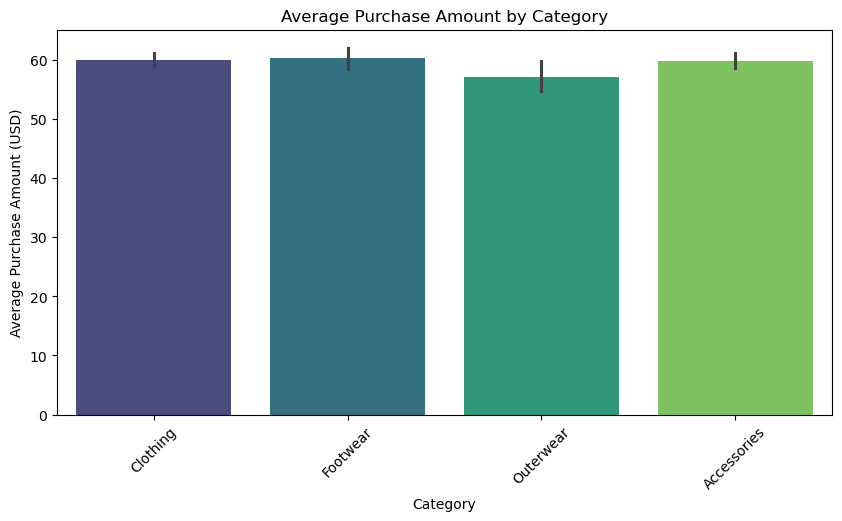

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# 3. Which gender has the highest number of purchases?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\1607217117.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




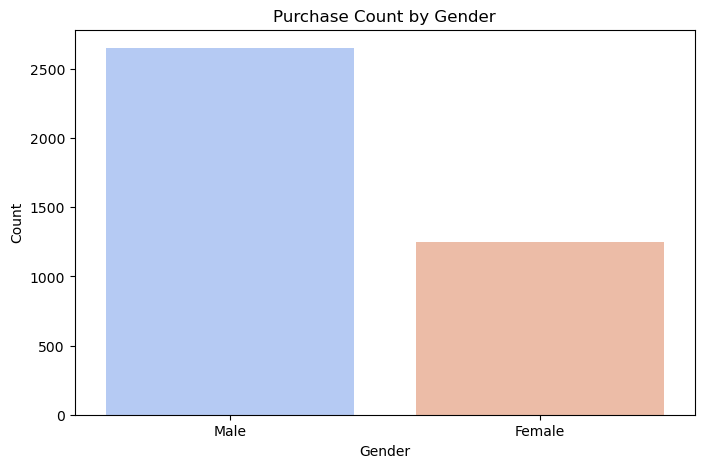

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Purchase Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# 4. What are the most commonly purchased items in each category?


In [73]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Review Rating Category',
       'Age_category'],
      dtype='object')

In [75]:
df.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\723498061.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




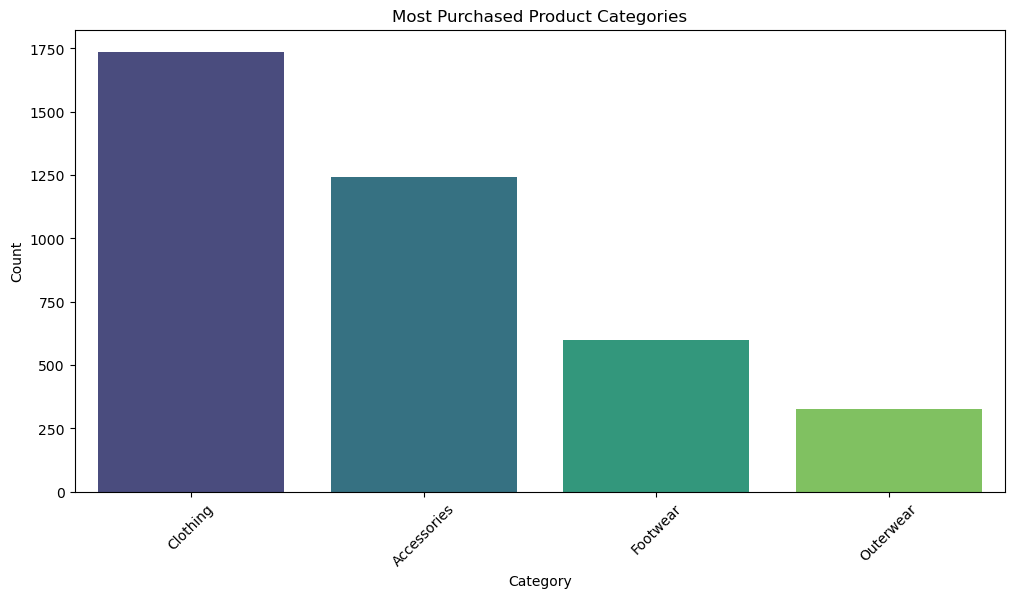

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Purchased Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


# 5. Are there any specific seasons or months where customer spending is significantly higher?

In [80]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [82]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

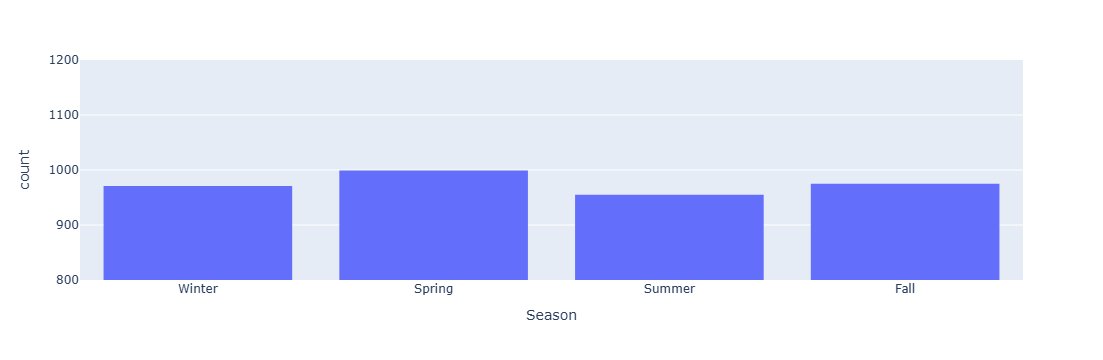

In [84]:
fig = px.histogram(df , x = 'Season' , range_y= [800 , 1200] )

fig.show()

# 6. What is the average rating given by customers for each product category?

In [88]:
df.groupby('Category')['Review Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

In [90]:
shop_groupby = df.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\3169898393.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




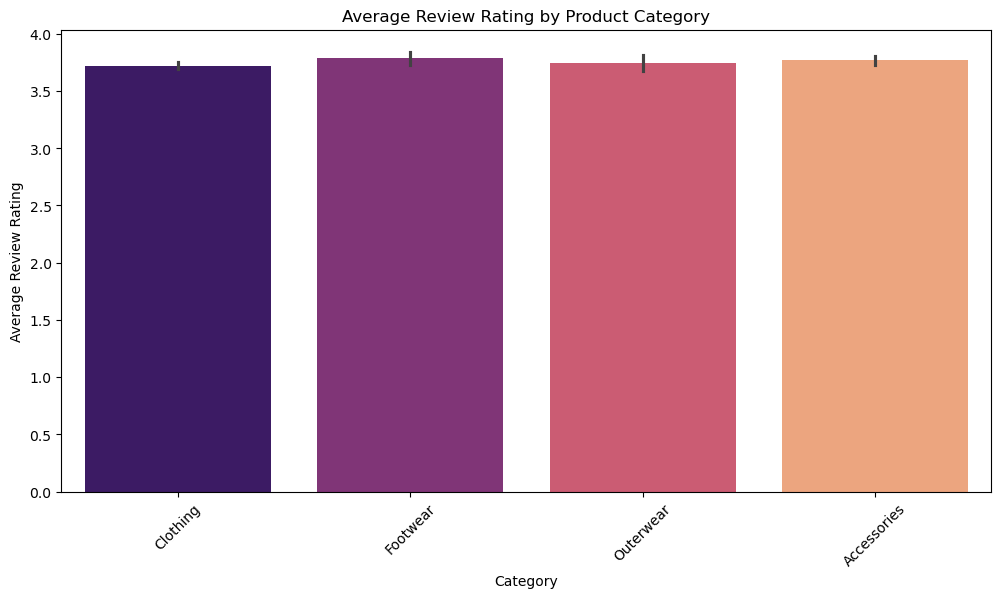

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Review Rating', data=df, estimator=lambda x: sum(x)/len(x), palette='magma')
plt.xticks(rotation=45)
plt.title('Average Review Rating by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.show()

# 7. Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [96]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Review Rating Category',
       'Age_category'],
      dtype='object')

In [98]:
df['Subscription Status'].value_counts()

Subscription Status
False    2847
True     1053
Name: count, dtype: int64

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

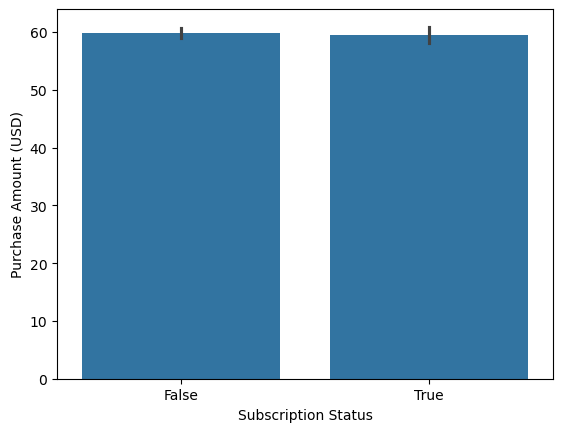

In [100]:
sns.barplot(df  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [102]:
df['Purchase Amount (USD)'].sum()

233081

In [104]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
False    59.865121
True     59.491928
Name: Purchase Amount (USD), dtype: float64

# 8. Which payment method is the most popular among customers?

In [107]:
df.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

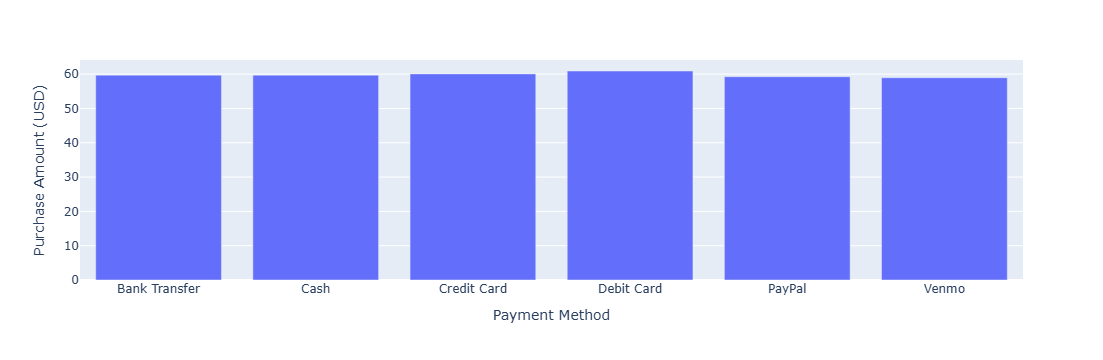

In [109]:
shop_groupby = df.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
fig.show()

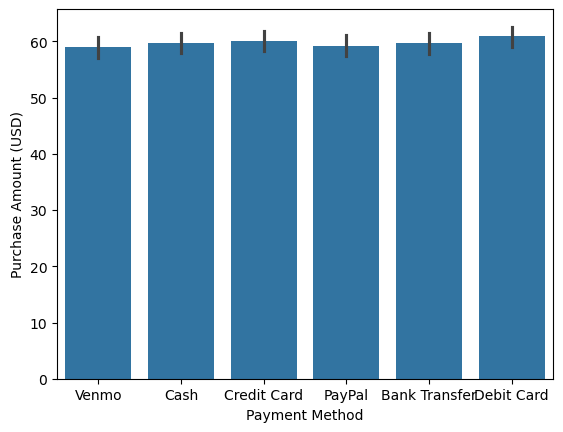

In [111]:
sns.barplot(df ,x='Payment Method' , y = 'Purchase Amount (USD)')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\2184223636.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




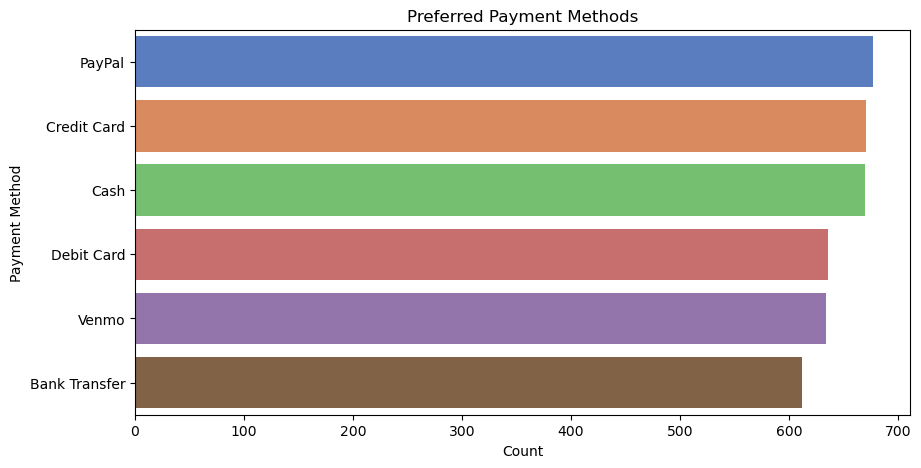

In [113]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Payment Method', data=df, order=df['Payment Method'].value_counts().index, palette='muted')
plt.title('Preferred Payment Methods')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

# 9. Do customers who use promo codes tend to spend more than those who don't?

In [118]:
shop_groupby  = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

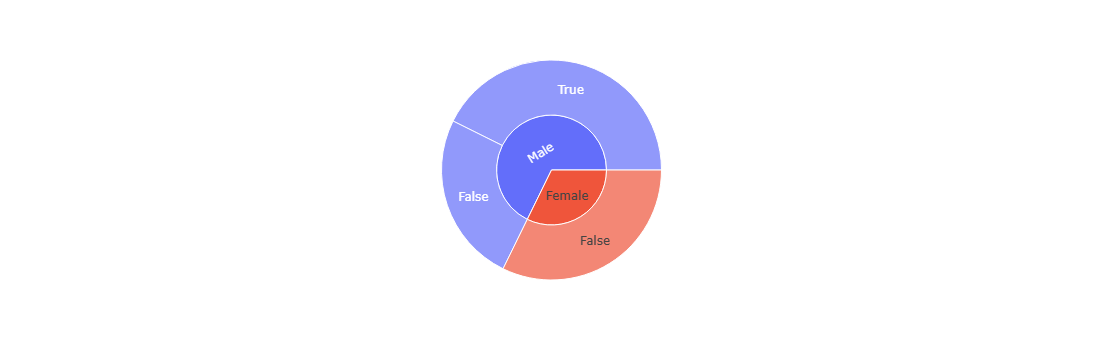

In [120]:
fig = px.sunburst(df , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

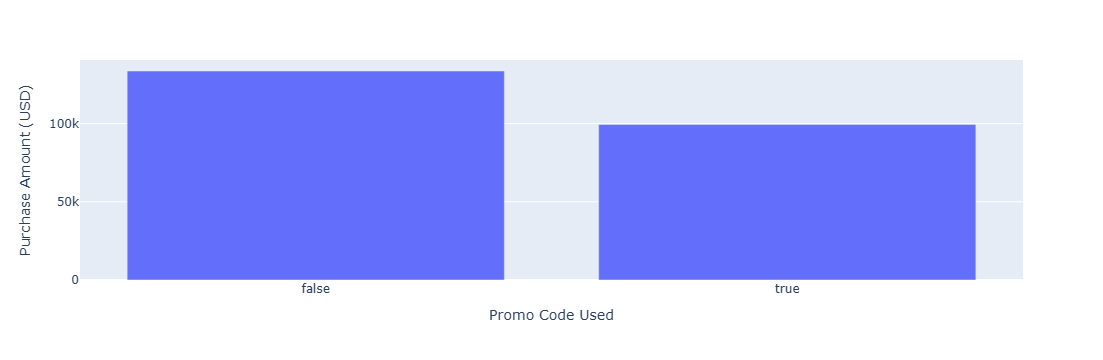

In [122]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\2126760691.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




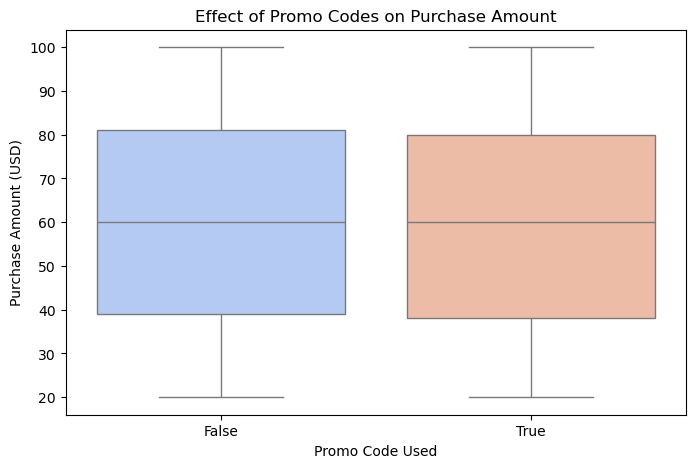

In [124]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Effect of Promo Codes on Purchase Amount')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# 10. How does the frequency of purchases vary across different age groups?

In [127]:
df[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [129]:
df['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



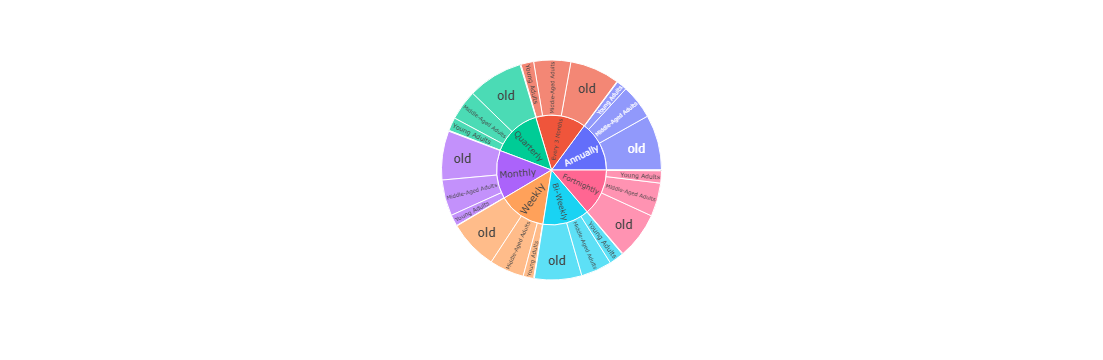

In [131]:
shop_group = df.groupby('Frequency of Purchases')['Age'].sum()
px.sunburst(df , path=['Frequency of Purchases','Age_category'] , values='Age')

# 11. Are there any correlations between the size of the product and the purchase amount?

In [134]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Review Rating Category',
       'Age_category'],
      dtype='object')

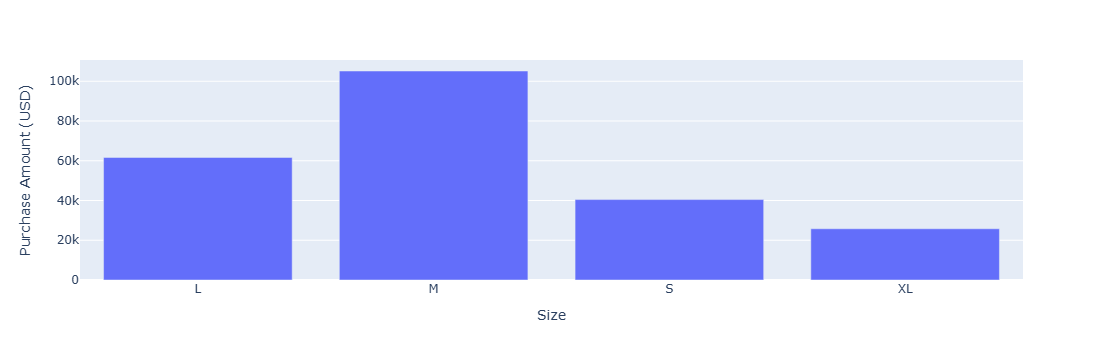

In [136]:
shop_group = df.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

# 12. Which shipping type is preferred by customers for different product categories?

In [141]:
df.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [143]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

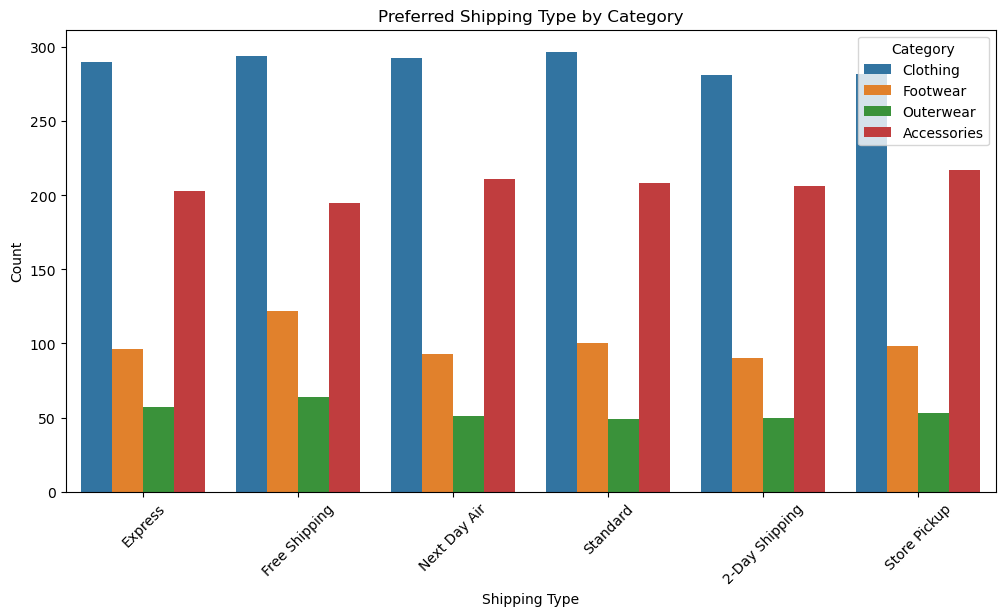

In [145]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Shipping Type', hue='Category', data=df, palette='tab10')
plt.title('Preferred Shipping Type by Category')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 13. How does the presence of a discount affect the purchase decision of customers?

In [148]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Review Rating Category',
       'Age_category'],
      dtype='object')

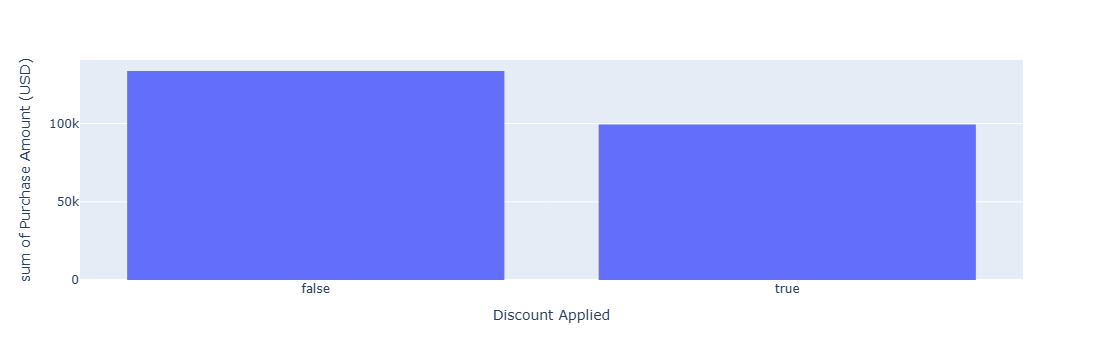

In [150]:
shop_group = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

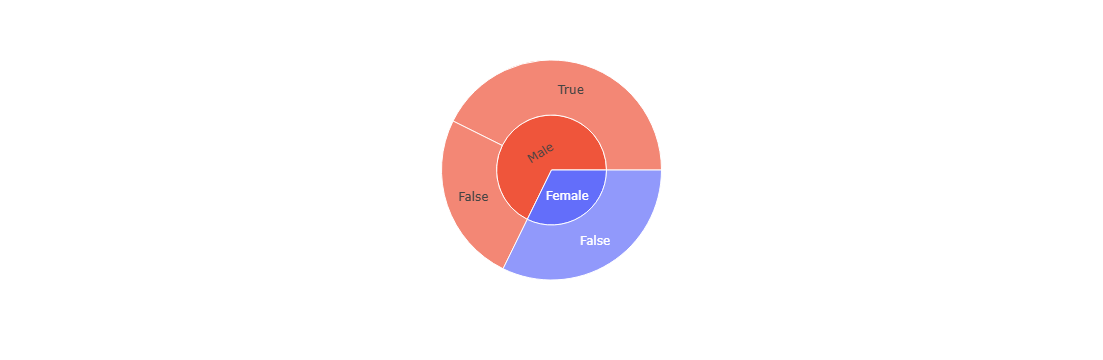

In [152]:
fig = px.sunburst(df , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

# 14. Are there any specific colors that are more popular among customers?

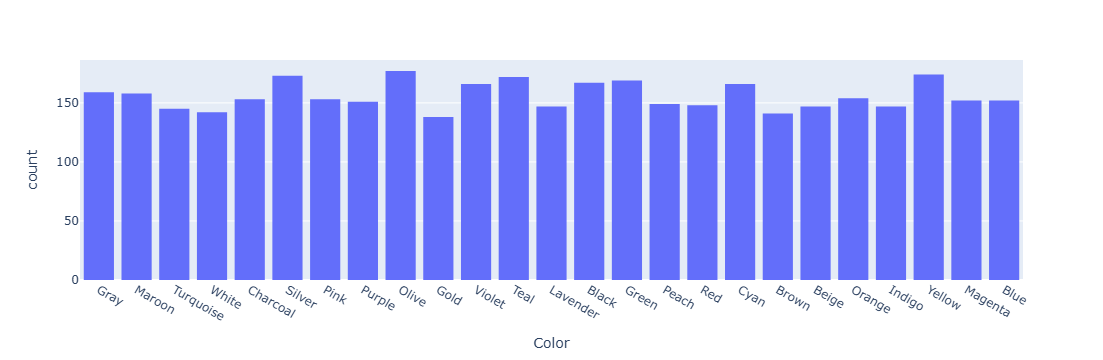

In [155]:
px.histogram(df , x = 'Color')

In [157]:
df['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\4135787746.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




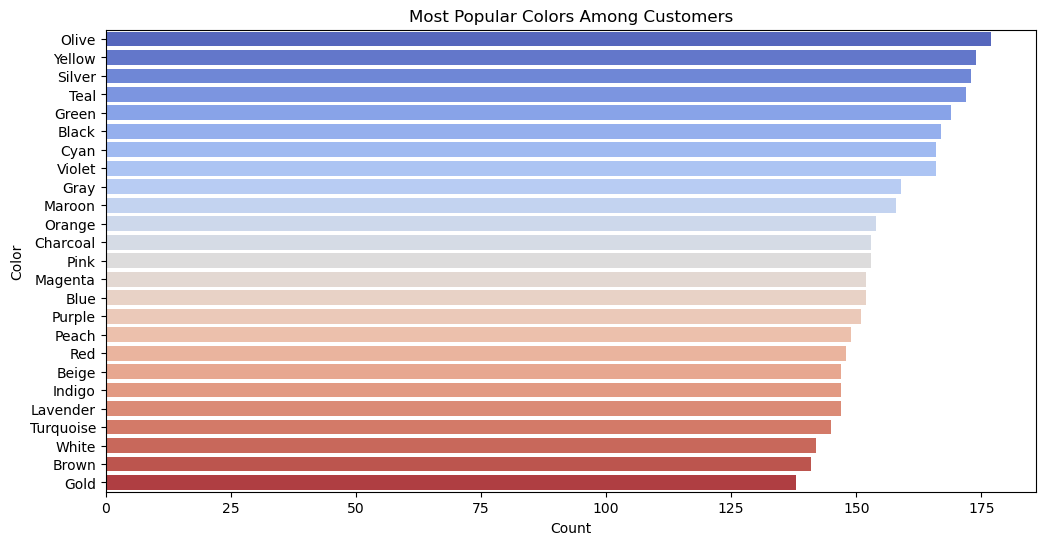

In [159]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Color', data=df, order=df['Color'].value_counts().index, palette='coolwarm')
plt.title('Most Popular Colors Among Customers')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

# 15. What is the average number of previous purchases made by customers?

In [162]:
df['Previous Purchases'].mean()

25.35153846153846

# 16. How does the purchase amount differ based on the review ratings given by customers?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\2095288467.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




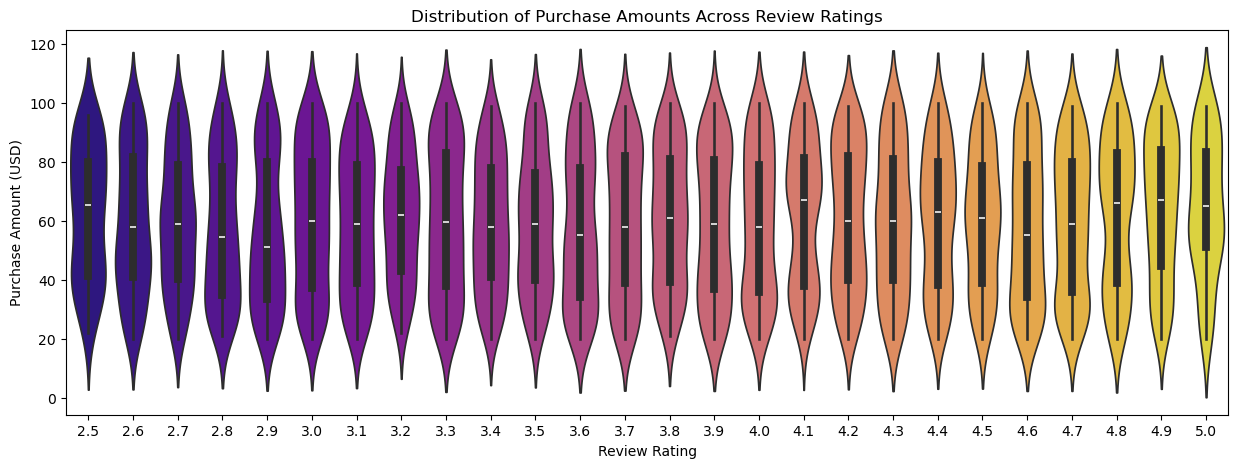

In [167]:
plt.figure(figsize=(15, 5))
sns.violinplot(x='Review Rating', y='Purchase Amount (USD)', data=df, palette='plasma')
plt.title('Distribution of Purchase Amounts Across Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()


# 17. Are there any noticeable differences in purchase behavior between different locations?

In [170]:
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).nlargest()

Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64

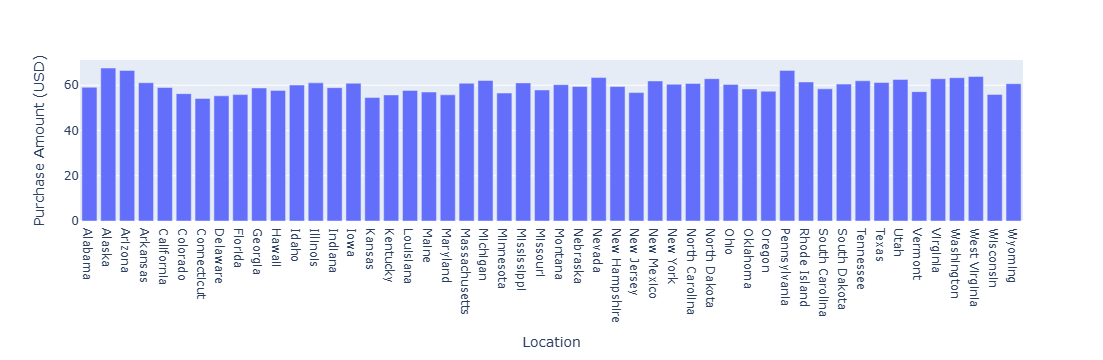

In [172]:
shop_group = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

# 18. Is there a relationship between customer age and the category of products they purchase?

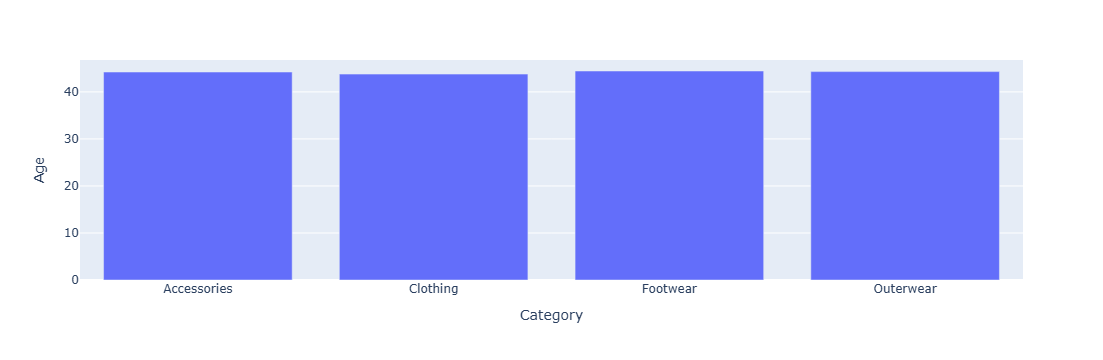

In [175]:
shop_group = df.groupby('Category')['Age'].mean().reset_index()
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

# 19. How does the average purchase amount differ between male and female customers?

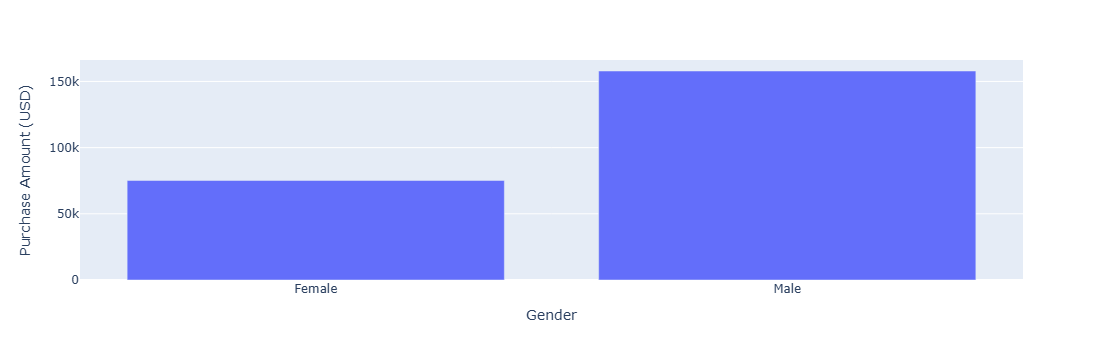

In [178]:
df_group=df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
fig=px.bar(df_group,x='Gender',y='Purchase Amount (USD)')
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



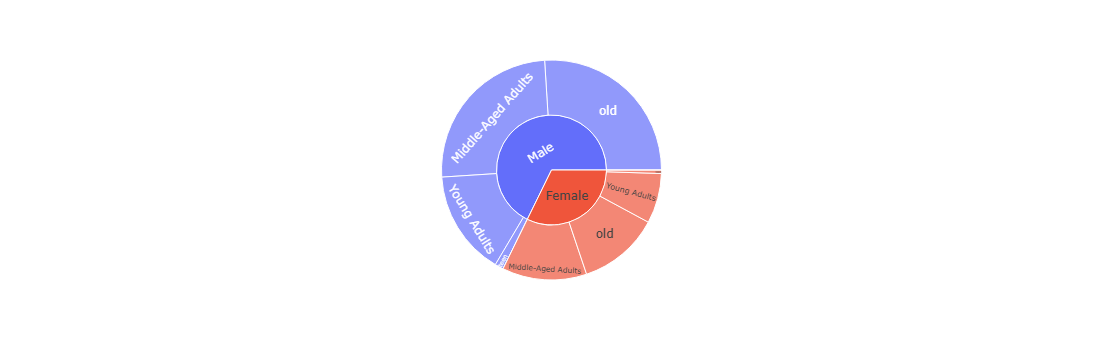

In [182]:
px.sunburst(data_frame= df , path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')